In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.stats import poisson
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import halfnorm
from scipy.ndimage import gaussian_filter


In [2]:
stars = np.loadtxt("./Exo-Occurrence/Data/FGK_properties.dat")
Nstars = len(stars)


In [3]:
#Assign number of p and r bins
nbins = 50
num_rbins_per_run = 5

#Create arrays 
pmin, pmax = 3, 30
rmin, rmax = 1.4, 2.4

pmin_log, pmax_log = np.log(pmin), np.log(pmax)
rmin_log, rmax_log = np.log(rmin), np.log(rmax)

pbins = np.linspace(pmin_log, pmax_log, nbins) #Make it one bigger to differentiate 
rbins = np.linspace(rmin_log, rmax_log, nbins + 1)

n_pbins = len(pbins) - 1
n_rbins = len(rbins) - 1

total_jobs = (len(pbins)-1) * (nbins // num_rbins_per_run)

In [4]:
#Identify the final iteration number for each job

files = [19, 23, 20, 25, 26, 25, 26, 22, 25, 22, 24, 21, 24, 21, 19, 22, 26, 24, 26, 24, 22, 24, 20, 24, 24, 26, 23, 23, 21, 21, 24, 22, 22, 22, 24, 25, 24, 23, 20, 21, 23, 24, 26, 20, 22, 23, 18, 24, 25, 22, 23, 23, 23, 23, 24, 21, 20, 20, 24, 26, 20, 24, 25, 22, 17, 26, 25, 23, 21, 23, 25, 25, 25, 23, 24, 21, 21, 21, 21, 24, 24, 22, 23, 23, 22, 23, 22, 24, 24, 23, 20, 22, 21, 22, 23, 22, 24, 22, 22, 24, 19, 18, 23, 20, 25, 22, 22, 24, 18, 20, 23, 24, 24, 24, 22, 22, 22, 22, 23, 23, 20, 20, 24, 20, 19, 21, 23, 21, 23, 20, 22, 20, 23, 21, 20, 23, 25, 24, 24, 19, 22, 21, 21, 23, 23, 20, 17, 22, 21, 19, 25, 21, 23, 21, 22, 19, 19, 23, 23, 21, 23, 23, 18, 22, 22, 22, 20, 21, 21, 19, 23, 21, 18, 18, 19, 20, 20, 22, 21, 22, 20, 18, 23, 19, 20, 22, 21, 24, 21, 19, 23, 22, 22, 21, 21, 21, 21, 22, 19, 22, 20, 20, 20, 20, 21, 22, 20, 24, 19, 21, 22, 21, 23, 22, 20, 19, 19, 21, 21, 21, 22, 20, 20, 22, 19, 24, 19, 22, 20, 23, 18, 20, 20, 21, 21, 21, 19, 18, 18, 21, 20, 20, 20, 20, 20, 21, 21, 21, 21, 20, 19, 19, 19, 20, 23, 20, 21, 19, 19, 21, 19, 19, 19, 20, 18, 20, 22, 19, 22, 19, 18, 22, 17, 22, 20, 19, 20, 19, 20, 21, 23, 20, 20, 20, 17, 19, 21, 21, 19, 20, 19, 20, 22, 18, 21, 19, 19, 21, 19, 19, 20, 19, 18, 21, 19, 18, 19, 18, 18, 19, 19, 22, 21, 21, 20, 19, 20, 21, 18, 19, 17, 19, 18, 21, 18, 18, 18, 20, 20, 20, 20, 20, 20, 19, 20, 20, 16, 18, 21, 20, 17, 20, 18, 20, 19, 21, 20, 22, 18, 21, 17, 18, 17, 19, 19, 18, 19, 18, 20, 18, 16, 18, 19, 19, 15, 22, 20, 20, 18, 18, 19, 17, 17, 15, 20, 19, 19, 21, 18, 19, 18, 21, 17, 18, 20, 17, 18, 17, 17, 16, 19, 19, 20, 22, 21, 18, 21, 17, 17, 18, 18, 18, 18, 17, 20, 19, 18, 18, 18, 16, 18, 20, 18, 21, 18, 18, 19, 18, 18, 20, 18, 17, 14, 17, 17, 15, 14, 17, 14, 18, 17, 17, 18, 16, 19, 18, 18, 18, 17, 15, 17, 17, 16, 18, 18, 16, 17, 19, 16, 18, 18, 16, 20, 17, 18, 18, 18, 17, 18, 18, 18, 18, 18, 17, 16, 18, 18, 15, 17, 17, 17, 17, 17, 18, 18, 14, 15, 17, 16, 17, 15, 17, 19, 15, 16, 16, 17, 15, 17, 16, 17, 17, 15, 16, 16, 17, 14, 18, 17, 16, 17, 18, 15, 14, 15, 17, 17, 16, 17, 19, 15, 17, 16, 17, 15, 17, 18, 16, 17, 17, 17, 15, 16, 15, 17, 15, 14, 17, 18, 17, 16, 16, 16, 16, 18, 15, 15, 15, 16, 15, 14, 16, 17, 16, 16, 15, 16, 13, 19, 16, 15, 12, 16, 16, 18, 16, 15, 16, 16, 16, 14, 16, 16, 17, 16, 15, 14, 18, 15, 14, 15, 16, 16, 14, 14, 15, 14, 16, 16, 17, 15, 16, 16, 16, 15, 16, 14, 15, 15, 15, 16, 15, 15, 15, 15, 14, 15, 15, 14, 15, 16, 15, 16, 16, 15, 15, 15, 14, 15, 14, 15, 13, 15, 14, 15, 15, 15, 16, 16, 16, 17, 17, 14, 15, 15, 15, 15, 14, 16, 15, 13, 14, 13, 13, 13, 16, 14, 15, 12, 14, 16, 15, 13, 15, 16, 16, 16, 14, 16, 14, 14, 15, 16, 15, 15, 14, 17, 14, 13, 15, 14, 14, 16, 17, 14, 15, 12, 16, 14, 14, 16, 12, 14, 15, 15, 15, 13, 15, 14, 15, 14, 14, 15, 15, 15, 15, 16, 15, 15, 15, 13, 15, 13, 14, 15, 14, 16, 13, 15, 14, 14, 15, 14, 14, 15, 12, 13, 15, 13, 14, 14, 13, 14, 13, 15, 14, 11, 14, 15, 13, 12, 14, 13, 14, 15, 13, 14, 15, 12, 13, 14, 14, 14, 14, 13, 14, 13, 12, 13, 15, 15, 14, 14, 13, 14, 12, 13, 14, 14, 13, 13, 13, 14, 15, 13, 13, 12, 14, 13, 13, 14, 15, 14, 13, 15, 12, 14, 15, 14, 14, 16, 13, 13, 14, 13, 13, 14, 14, 13, 14, 15, 14, 13, 13, 12, 12, 14, 14, 11, 14, 13, 14, 14, 13, 14, 15, 13, 14, 12, 12, 13, 13, 12, 16, 14, 13, 14, 13, 14, 15, 11, 13, 12, 13, 13, 12, 15, 13, 12, 13, 12, 14, 13, 15, 13, 12, 15, 13, 13, 13, 12, 13, 14, 13, 13, 12, 13, 13, 12, 12, 13, 13, 12, 12, 14, 14, 11, 14, 13, 13, 13, 12, 12, 12, 12, 14, 13, 15, 13, 11, 13, 13, 13, 13, 14, 13, 13, 13, 12, 13, 14, 14, 14, 13, 13, 12, 14, 13, 12, 11, 13, 13, 14, 13, 12, 14, 12, 13, 13, 13, 12, 14, 12, 13, 12, 11, 13, 13, 12, 13, 11, 13, 14, 12, 12, 13, 15, 13, 13, 13, 12, 13, 13, 13, 13, 13, 12, 13, 12, 14, 12, 13, 12, 12, 13, 12, 12, 11, 11, 13, 13, 13, 11, 14, 13, 14, 13, 13, 14, 13, 12, 11, 13, 13, 13, 12, 13, 14, 12, 14, 12, 13, 11, 13, 12, 13, 13, 11, 11, 13, 12, 13, 14, 12, 12, 13, 13, 12, 13, 12, 12, 14, 14, 13, 14, 11, 14, 13, 13, 13, 13, 13, 12, 12, 14, 12, 12, 13, 10, 11]
job_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990]

files_50 = [36, 38, 35, 47, 35, 47, 38, 52, 39, 45, 35, 37, 36, 35, 37, 43, 46, 48, 39, 50, 31, 38, 44, 38, 37, 35, 37, 48, 45, 39, 34, 35, 35, 40, 37, 43, 37, 38, 46, 38, 34, 35, 33, 35, 35, 37, 48, 48, 46, 36, 35, 33, 36, 36, 47, 49, 36, 38, 34, 44, 34, 33, 35, 33, 49, 37, 53, 42, 43, 43, 47, 33, 38, 35, 47, 31, 51, 36, 40, 36, 33, 32, 46, 32, 35, 40, 47, 42, 31, 39, 37, 31, 35, 34, 34, 34, 35, 41, 34, 36, 40, 34, 34, 36, 33, 33, 38, 41, 44, 38, 37, 33, 32, 46, 35, 43, 36, 35, 33, 44, 33, 34, 33, 37, 37, 33, 39, 37, 33, 32, 32, 40, 28, 43, 36, 32, 51, 37, 38, 35, 40, 33, 33, 36, 34, 37, 32, 36, 33, 34, 37, 36, 38, 36, 32, 47, 40, 45, 43, 37, 42, 34, 34, 33, 46, 35, 34, 33, 35, 35, 31, 34, 33, 29, 31, 48, 32, 32, 42, 32, 42, 31, 31, 32, 32, 32, 30, 29, 29, 32, 32, 29, 29, 29, 36, 41, 33, 35, 29, 31, 29, 30, 30, 34, 43, 47, 40, 30, 31, 49, 34, 37, 29, 28, 31, 31, 33, 32, 28, 31, 29, 29, 26, 40, 31, 31, 30, 33, 33, 29, 31, 50, 30, 30, 31, 30, 29, 31, 41, 37, 39, 32, 31, 31, 30, 32, 28, 34, 30, 27, 30, 34, 29, 30, 39, 32, 31, 32, 39, 30, 31, 28, 28, 30, 43, 25, 29, 27, 34, 30, 29, 37, 47, 32, 31, 27, 31, 38, 30, 30, 26, 54, 28, 32, 27, 28, 27, 28, 26, 30, 31, 25, 40, 31, 32, 27, 26, 29, 27, 28, 30, 29, 18, 34, 40, 31, 26, 30, 29, 29, 26, 29, 29, 29, 26, 30, 28, 29, 29, 25, 27, 47, 39, 36, 27, 29, 29, 24, 26, 24, 29, 25, 25, 23, 36, 26, 30, 28, 20, 34, 31, 33, 22, 34, 24, 24, 45, 27, 27, 27, 27, 25, 29, 29, 33, 30, 27, 27, 26, 25, 21, 25, 36, 27, 27, 22, 25, 26, 20, 26, 23, 36, 27, 33, 44, 28, 26, 34, 23, 26, 29, 25, 23, 36, 25, 28, 25, 23, 20, 27, 27, 30, 37, 30, 38, 26, 23, 24, 23, 27, 27, 32, 22, 21, 25, 27, 50, 24, 39, 23, 23, 27, 28, 25, 21, 31, 33, 30, 23, 23, 36, 28, 25, 23, 36, 40, 26, 43, 25, 26, 33, 30, 31, 32, 23, 22, 34, 30, 25, 22, 23, 24, 28, 29, 29, 24, 31, 23, 25, 22, 23, 23, 25, 20, 27, 22, 32, 24, 19, 28, 25, 23, 22, 25, 27, 17, 22, 30, 23, 31, 24, 26, 32, 24, 34, 24, 17, 19, 20, 22, 22, 40, 31, 19, 22, 18, 22, 40, 20, 18]  
job_numbers_50 = np.linspace(1, 490, 490)

#Keeping job number array in case we need it later

In [5]:
#Make rate array
rate = np.zeros((n_pbins, n_rbins))

#Fill rate array
for n in range(total_jobs):
    output = pd.read_table(f'~/Radius_Valley/Output_Mar3/rvalley_sims_{n+1}_{files_50[n]}.dat', header = 0, sep='\s+')
    r = []
    pbin_index = (n) // (nbins // num_rbins_per_run)
    rchunk_index = (n) % (nbins // num_rbins_per_run)
    for i in range(num_rbins_per_run):
        r.append(output[f'r{i+1}'].values)
        rbin_index = rchunk_index*num_rbins_per_run + i
        rate[(np.abs(pbin_index-n_pbins+1)),rbin_index] = np.median(r[i])*100 #Convert to percentage




In [6]:
total_rate_p = np.zeros(n_pbins)
for n in range(n_pbins):
    total_rate_p[n] = (np.sum(rate[n,:])/100)*Nstars


total_rate_r = np.zeros(n_rbins)
for n in range(n_rbins):
    total_rate_r[n] = (np.sum(rate[:,n], axis=0)/100)*Nstars

#print(total_rate_r)

[1.4        1.41517354 1.43051153 1.44601577 1.46168804 1.47753017
 1.493544   1.50973139 1.52609422 1.5426344  1.55935385 1.57625451
 1.59333833 1.61060732 1.62806348 1.64570882 1.66354541 1.68157532
 1.69980065 1.7182235  1.73684602 1.75567038 1.77469876 1.79393338
 1.81337646 1.83303028 1.85289711 1.87297925 1.89327906 1.91379888
 1.93454109 1.95550812 1.97670239 1.99812637 2.01978255 2.04167344
 2.0638016  2.08616958 2.10877999 2.13163546 2.15473864 2.17809222
 2.20169892 2.22556146 2.24968264 2.27406525 2.29871212 2.32362612
 2.34881014 2.37426712]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


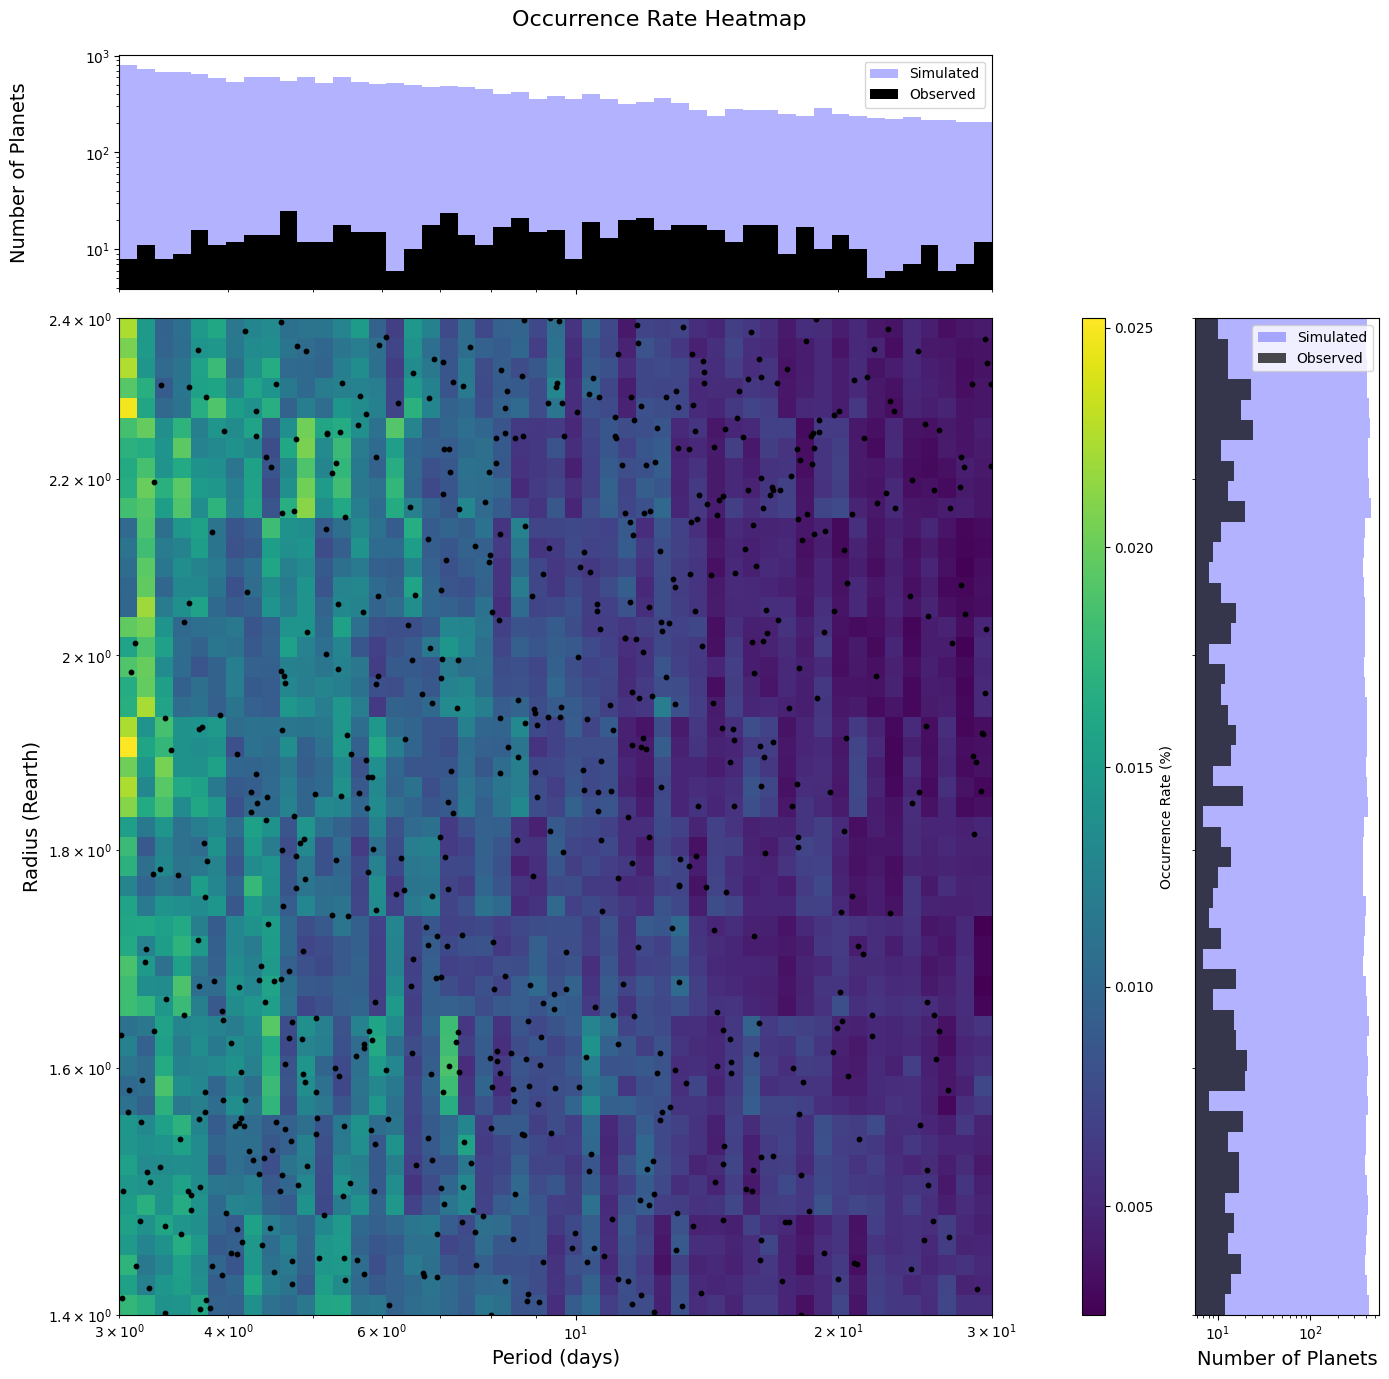

In [7]:
# Define grid for the contour plot
p_labels = np.exp(np.linspace(np.log(3), np.log(30), n_pbins + 1))
r_labels = np.exp(np.linspace(np.log(1.4), np.log(2.4), n_rbins + 1))
P, R = np.meshgrid(p_labels, r_labels)
print(r_labels[:-1])

# Load Data
planets = pd.read_table('~/Radius_Valley/Exo-Occurrence/Data/FGK_planets.dat', header=0, sep='\s+')
p = planets['period']
r = planets['radius']

mask_p = (r >= 1.4) & (r <= 2.4)
mask_r = (p >= 3) & (p <= 30)

print(type(r_labels[:-1]))
print(type(total_rate_r))
print(type(np.diff(r_labels)))

# Set up figure and GridSpec
fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(4, 5, width_ratios=[1, 1, 1, 0.1, 0.8], height_ratios=[0.75, 1, 1, 1],
                       wspace=0.5, hspace=0.1)  # Adjust spacing

# Create Plots
ax_main = fig.add_subplot(gs[1:4, 0:3])  
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)  
ax_yhist = fig.add_subplot(gs[1:4, 4], sharey=ax_main) 
ax_cbar = fig.add_subplot(gs[1:4, 3]) 

# Create Contour
contour = ax_main.pcolormesh(P, R, rate.T, cmap='viridis')
fig.colorbar(contour, cax=ax_cbar, label="Occurrence Rate (%)")

# Scatter Plot
ax_main.scatter(p, r, color='black', s=10)

ax_main.set_xscale('log')
ax_main.set_yscale('log')
ax_main.set_xlim(3, 30)
ax_main.set_ylim(1.4, 2.4)

ax_main.set_xlabel("Period (days)", fontsize=14)
ax_main.set_ylabel("Radius (Rearth)", fontsize=14)

# Histograms
ax_xhist.bar(p_labels[:-1], total_rate_p, color='blue', width=np.diff(p_labels), align='edge', alpha=0.3)
ax_xhist.hist(p[mask_p], bins=np.exp(np.linspace(np.log(3), np.log(30), nbins)), color='black')
ax_yhist.barh(r_labels[:-1], total_rate_r, color='blue', height=np.diff(r_labels), align='edge', alpha=0.3)
ax_yhist.hist(r[mask_r], bins=np.exp(np.linspace(np.log(1.4), np.log(2.4), nbins)), orientation='horizontal', 
              color='black', alpha=0.7)
#ax_yhist.hist(total_rate_r, bins=np.exp(np.linspace(np.log(1.4), np.log(2.4), nbins)), orientation='horizontal', 
              #color='gray', alpha=0.7)


ax_xhist.set_xscale('log')
ax_xhist.set_yscale('log')
ax_xhist.legend(['Simulated', 'Observed'])

ax_yhist.set_xscale('log')
ax_yhist.set_yscale('log')
ax_yhist.legend(['Simulated', 'Observed'])

ax_xhist.set_xlim(3, 30) # Align with the main plot x-axis limits
ax_yhist.set_ylim(1.4, 2.4)

ax_xhist.set_ylabel("Number of Planets", fontsize=14, labelpad=40)
ax_yhist.set_xlabel("Number of Planets", fontsize=14, labelpad=5)
ax_xhist.tick_params(axis="x", which="both", labelbottom=False)
ax_yhist.tick_params(axis="y", which="both", labelleft=False)

plt.suptitle("Occurrence Rate Heatmap", fontsize=16)
plt.subplots_adjust(top=0.95, left=0.2, right=0.9)

plt.show()

In [8]:
# plt.scatter(np.log(p), np.log(r), s=5)
# plt.xlim(np.log(3), np.log(30))
# plt.ylim(np.log(1.4), np.log(2.4))
# # plt.xscale('log')
# # plt.yscale('log')
# plt.show()

In [9]:
def plot_distributions(job, file_array, output_directory, rbin = None):

    m = file_array[job-1]

    output = pd.read_table(f'~/Radius_Valley/{output_directory}/rvalley_sims_{job}_{m}.dat', header = 0, sep='\s+')
    r = []

    rbin_index = job % (nbins // num_rbins_per_run)

    if rbin is not None:
        r = output[f'r{rbin+1}'].values*100
        r_low, r_high = np.exp(rbins[rbin_index*10 + rbin]), np.exp(rbins[rbin_index*10 + rbin + 1])
        plt.hist(r, bins = 50)
        plt.title(f'r{rbin+1}')
        plt.xlabel(f'Occurence Rate {r_low} to {r_high} Rearth')
        plt.show()
    else:
        for i in range(num_rbins_per_run):
            r.append((output[f'r{i+1}'].values)*100)
            r_low, r_high = np.exp(rbins[rbin_index*10+i]), np.exp(rbins[rbin_index*10+i+1])
            plt.hist(r[i], bins = 50)
            plt.title('r'+str(i+1))
            plt.xlabel(f'Occurence Rate {r_low} to {r_high} Rearth')
            plt.show()

        

def get_jobid_from_bins(pbin, rbins, p_reflected = False):
    r_chunk = (rbins // num_rbins_per_run) + 1
    if p_reflected:
        if nbins:
            pbin = nbins - pbin
        else:
            raise ValueError('nbins must be provided if p_reflected is True')
    job_id = pbin * (nbins // num_rbins_per_run) + r_chunk
    return job_id       
    



In [10]:
job_array = []
r_array = []

for n in range(n_pbins):
    for i in range(n_rbins):
        if rate[n,i]>= 0.016:
            job = get_jobid_from_bins(n,i)
            r_index = i % (nbins // num_rbins_per_run)
            r_array.append(r_index)
            job_array.append(job)
            print(n, i, job)
print(job_array)
print(r_array)

0 0 1
0 2 1
0 15 4
0 16 4
0 17 4
0 18 4
0 22 5
0 23 5
0 25 6
0 26 6
0 27 6
0 28 6
0 29 6
0 30 7
0 31 7
0 32 7
0 34 7
0 40 9
0 41 9
0 42 9
0 43 9
0 44 9
0 45 10
0 46 10
0 47 10
0 48 10
0 49 10
1 0 11
1 5 12
1 15 14
1 19 14
1 25 16
1 30 17
1 31 17
1 32 17
1 33 17
1 34 17
1 35 18
1 36 18
1 37 18
1 38 18
1 39 18
1 40 19
1 41 19
1 42 19
1 43 19
1 44 19
1 46 20
2 10 23
2 11 23
2 12 23
2 25 26
2 26 26
2 27 26
2 28 26
2 29 26
2 41 29
3 3 31
3 5 32
3 9 32
3 15 34
3 16 34
3 18 34
3 19 34
3 26 36
3 40 39
3 41 39
3 42 39
3 43 39
3 44 39
4 25 46
4 45 50
5 40 59
5 45 60
5 47 60
5 49 60
7 1 71
7 21 75
8 10 83
8 11 83
8 12 83
8 13 83
8 14 83
8 39 88
8 45 90
8 47 90
9 40 99
9 43 99
10 40 109
10 41 109
10 42 109
10 43 109
10 44 109
12 0 121
12 40 129
12 41 129
12 42 129
12 43 129
12 44 129
14 13 143
14 28 146
15 40 159
15 41 159
15 42 159
15 44 159
16 39 168
16 45 170
18 10 183
18 11 183
18 12 183
18 13 183
18 14 183
[1, 1, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 

1 0


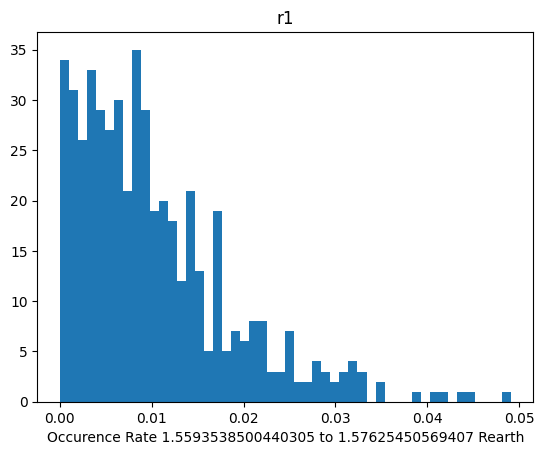

1 2


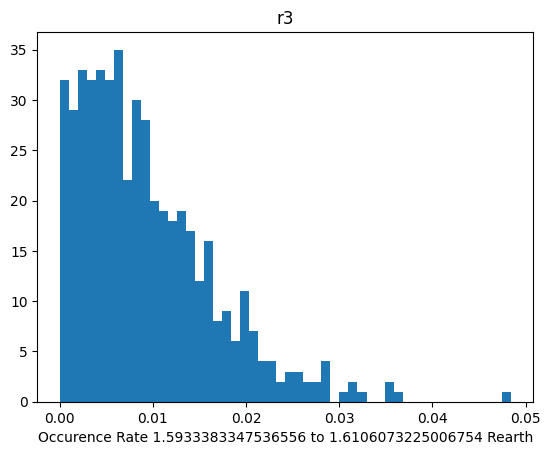

4 5


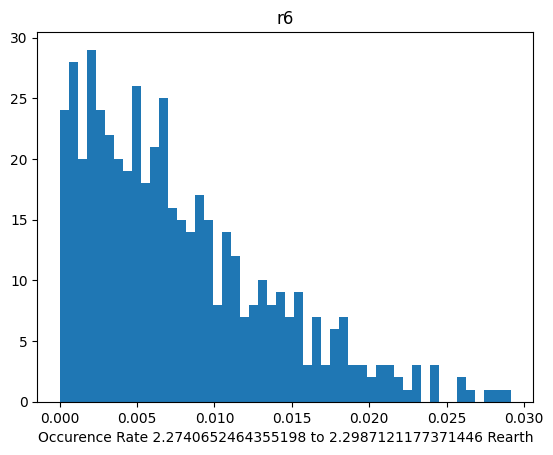

4 6


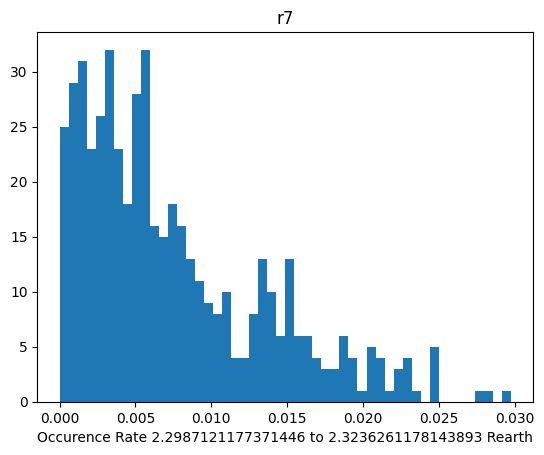

4 7


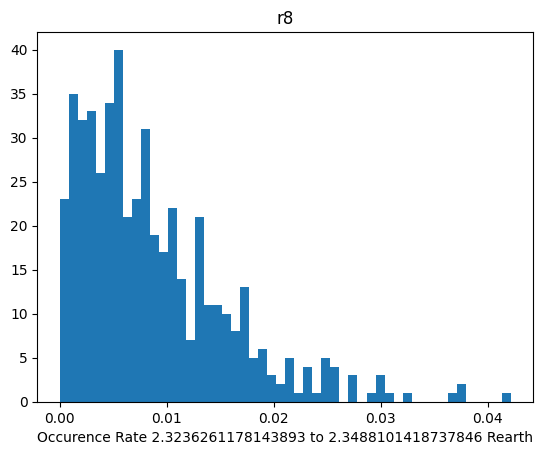

4 8


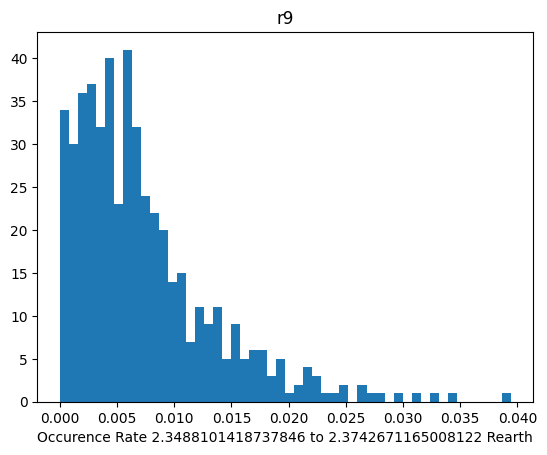

5 2


IndexError: index 52 is out of bounds for axis 0 with size 51

In [11]:
for i in range(len(job_array)):
    job = job_array[i]
    specific_r = r_array[i]
    print(job, specific_r)
    plot_distributions(job, files, 'Output_Feb28', rbin = specific_r)


In [ ]:
def check_if_missing_numbers(array, length):
    for i in range(1, length):
        if i not in array:
            print(i)
    print("No missing numbers")
    return

def convert_array_to_bash(array):
    arr = " ".join(map(str, array))
    print(arr)
    return arr

In [ ]:
m_bash = convert_array_to_bash(files_50)


36 38 35 47 35 47 38 52 39 45 35 37 36 35 37 43 46 48 39 50 31 38 44 38 37 35 37 48 45 39 34 35 35 40 37 43 37 38 46 38 34 35 33 35 35 37 48 48 46 36 35 33 36 36 47 49 36 38 34 44 34 33 35 33 49 37 53 42 43 43 47 33 38 35 47 31 51 36 40 36 33 32 46 32 35 40 47 42 31 39 37 31 35 34 34 34 35 41 34 36 40 34 34 36 33 33 38 41 44 38 37 33 32 46 35 43 36 35 33 44 33 34 33 37 37 33 39 37 33 32 32 40 28 43 36 32 51 37 38 35 40 33 33 36 34 37 32 36 33 34 37 36 38 36 32 47 40 45 43 37 42 34 34 33 46 35 34 33 35 35 31 34 33 29 31 48 32 32 42 32 42 31 31 32 32 32 30 29 29 32 32 29 29 29 36 41 33 35 29 31 29 30 30 34 43 47 40 30 31 49 34 37 29 28 31 31 33 32 28 31 29 29 26 40 31 31 30 33 33 29 31 50 30 30 31 30 29 31 41 37 39 32 31 31 30 32 28 34 30 27 30 34 29 30 39 32 31 32 39 30 31 28 28 30 43 25 29 27 34 30 29 37 47 32 31 27 31 38 30 30 26 54 28 32 27 28 27 28 26 30 31 25 40 31 32 27 26 29 27 28 30 29 18 34 40 31 26 30 29 29 26 29 29 29 26 30 28 29 29 25 27 47 39 36 27 29 29 24 26 24 29 25 25 2

In [ ]:
check_if_missing_numbers(n_array, 990)
    

No missing numbers


# Code to Plot New Distributions

In [21]:
file = pd.read_table(f'~/Radius_Valley/Gapfit_Output/rvalley_sims_5_33.dat', header = 0, sep='\s+')

In [22]:
mean_1 = [np.median(file['mean1p']), np.median(file['mean1r'])]
print(10**np.atleast_1d(mean_1))
mean_2 = [np.median(file['mean2p']), np.median(file['mean2r'])]
print(10**np.atleast_1d(mean_2))
cov1 = [[np.median(file['cov1p']), np.median(file['cov1pr'])], [np.median(file['cov1pr']), np.median(file['cov1r'])]]
cov2 = [[np.median(file['cov2p']), np.median(file['cov2pr'])], [np.median(file['cov2pr']), np.median(file['cov2r'])]]

[3.03848238 1.48956678]
[19.41232239  2.47554537]


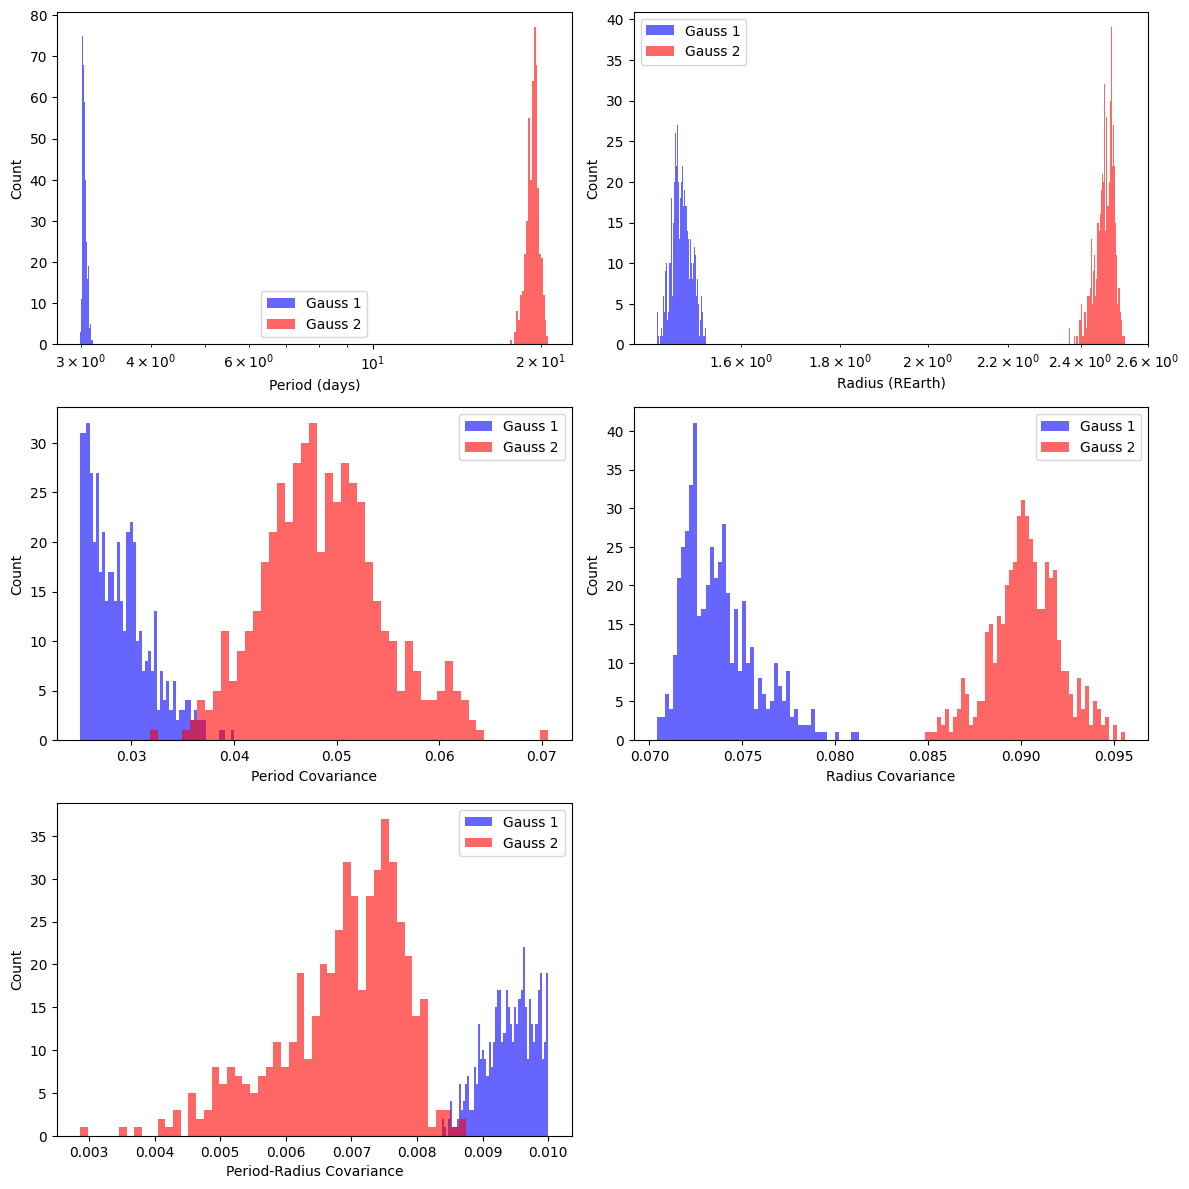

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns
axes = axes.flatten()

# Plot 1: Period (days)
axes[0].hist(10**file['mean1p'], bins=20, color='blue', alpha=0.6)
axes[0].hist(10**file['mean2p'], bins=20, color='red', alpha=0.6)
axes[0].set_xscale('log')
axes[0].set_xlabel('Period (days)')
axes[0].set_ylabel('Count')
axes[0].legend(['Gauss 1', 'Gauss 2'])

# Plot 2: Radius (REarth)
axes[1].hist(10**file['mean1r'], bins=50, color='blue', alpha=0.6)
axes[1].hist(10**file['mean2r'], bins=50, color='red', alpha=0.6)
axes[1].set_xscale('log')
axes[1].set_xlabel('Radius (REarth)')
axes[1].set_ylabel('Count')
axes[1].legend(['Gauss 1', 'Gauss 2'])

# Plot 3: Period Covariance
axes[2].hist(file['cov1p'], bins=50, color='blue', alpha=0.6)
axes[2].hist(file['cov2p'], bins=50, color='red', alpha=0.6)
axes[2].set_xlabel('Period Covariance')
axes[2].set_ylabel('Count')
axes[2].legend(['Gauss 1', 'Gauss 2'])

# Plot 4: Radius Covariance
axes[3].hist(file['cov1r'], bins=50, color='blue', alpha=0.6)
axes[3].hist(file['cov2r'], bins=50, color='red', alpha=0.6)
axes[3].set_xlabel('Radius Covariance')
axes[3].set_ylabel('Count')
axes[3].legend(['Gauss 1', 'Gauss 2'])

# Plot 5: Period-Radius Covariance
axes[4].hist(file['cov1pr'], bins=50, color='blue', alpha=0.6)
axes[4].hist(file['cov2pr'], bins=50, color='red', alpha=0.6)
axes[4].set_xlabel('Period-Radius Covariance')
axes[4].set_ylabel('Count')
axes[4].legend(['Gauss 1', 'Gauss 2'])

# Hide empty subplot (since we have 5 plots but a 3x2 grid)
axes[5].axis('off')

plt.tight_layout()
plt.show()


In [29]:
total_rate_1 = file['n1'] #number of planets per star
total_rate_2 = file['n2'] #number of planets per star
n_sample_1 = poisson.rvs(np.median(total_rate_1)*Nstars)
n_sample_2 = poisson.rvs(np.median(total_rate_2)*Nstars)

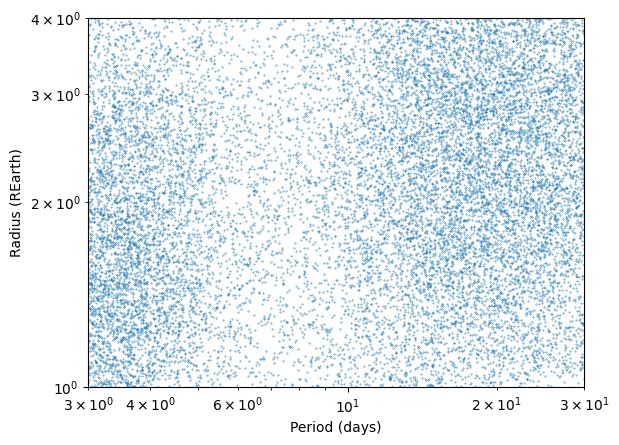

In [30]:
sample1 = np.random.multivariate_normal(mean_1, cov1, n_sample_1)
sample2 = np.random.multivariate_normal(mean_2, cov2, n_sample_2)

planets = np.vstack([sample1, sample2])
plt.scatter(10**planets[:,0], 10**planets[:,1], s=0.1)
plt.xlim(3, 30)
plt.ylim(1.0, 4.0)
plt.xlabel('Period (days)')
plt.ylabel('Radius (REarth)')
plt.xscale('log')
plt.yscale('log')
plt.show()



In [31]:
# Get info from gauss
p_gauss = planets[:,0]
r_gauss = planets[:,1]

In [32]:
# Limit range of data

limit = (p_gauss >= np.log10(1)) & (p_gauss <= np.log10(100)) & (r_gauss >= np.log10(1)) & (r_gauss <= np.log10(4))

p_gauss = p_gauss[limit]    
r_gauss = r_gauss[limit]

# Create bins
xbins = 10**np.linspace(min(p_gauss), max(p_gauss), 25)
ybins = 10**np.linspace(min(r_gauss), max(r_gauss), 25)
print(xbins)

[ 1.0079821   1.22012812  1.47692368  1.78776599  2.16403006  2.61948495
  3.17079763  3.83814292  4.64594175  5.62375481  6.80736435  8.24008352
  9.97434145 12.07360182 14.61468525 17.69058052 21.41384734 25.92073547
 31.37617061 37.97978969 45.97324648 55.64905465 67.36129206 81.53855797
 98.69965721]


In [33]:
# Get information of gap
def equation_of_line(x):
    slope = np.log10(np.abs(2.1050467815480065 - 1.6409950173104595))/np.log10(np.abs(2.949150729647069 - 29.749854668099353))
    y = slope*x + np.log10(2.4)
    return y

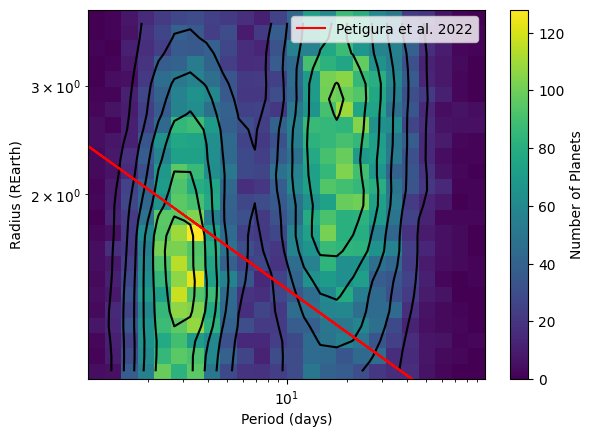

In [34]:
z = plt.hist2d(10**p_gauss, 10**r_gauss, bins=[xbins, ybins])
plt.colorbar(label='Number of Planets')
plt.contour(z[1][:-1]+np.diff(z[1])[0]/2, z[2][:-1]+np.diff(z[2])[0]/2, gaussian_filter(z[0].T, 1), colors='black')
y_gauss = equation_of_line(p_gauss)
plt.plot(10**p_gauss, 10**y_gauss, color='red')
plt.legend(['Petigura et al. 2022'])

plt.xlabel('Period (days)')
plt.ylabel('Radius (REarth)')
#plt.xlim(1,300)
#plt.ylim(1,4)
plt.xscale('log')
plt.yscale('log')
plt.show()

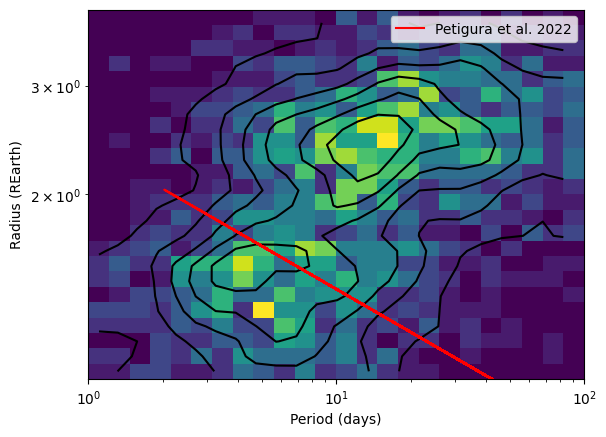

In [173]:
observed = plt.hist2d(p, r, bins=[xbins, ybins])
plt.contour(observed[1][:-1]+np.diff(observed[1])[0]/2, observed[2][:-1]+np.diff(observed[2])[0]/2, gaussian_filter(observed[0].T, 1), colors='black')
y = equation_of_line(p)
plt.plot(10**p, 10**y, color='red')
#plt.xlim(np.log10(3),np.log10(30))
#plt.ylim(-0.2, 0.8)
plt.legend(['Petigura et al. 2022'])

plt.xlabel('Period (days)')
plt.ylabel('Radius (REarth)')
plt.xlim(1,100)
#plt.ylim(1,4)
plt.xscale('log')
plt.yscale('log')

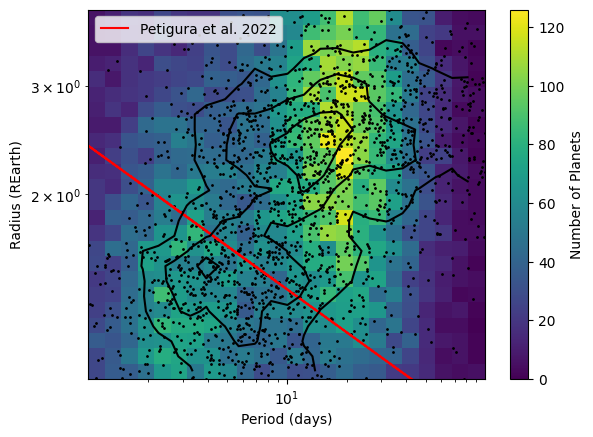

In [179]:
z = plt.hist2d(10**p_gauss, 10**r_gauss, bins=[xbins, ybins])
plt.colorbar(label='Number of Planets')
y_gauss = equation_of_line(p_gauss)
plt.plot(10**p_gauss, 10**y_gauss, color='red')

plt.scatter(p, r, s=1, color='black')
plt.contour(observed[1][:-1]+np.diff(observed[1])[0]/2, observed[2][:-1]+np.diff(observed[2])[0]/2, gaussian_filter(observed[0].T, 0.75), colors='black', levels=3)

plt.legend(['Petigura et al. 2022'])

plt.xlabel('Period (days)')
plt.ylabel('Radius (REarth)')
#plt.xlim(1,300)
#plt.ylim(1,4)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# dist = []

# hist_obs, _, _ = np.histogram2d(p_obs_valley, r_obs_valley, bins=[pbins, rbins])
# hist_sim, _, _ = np.histogram2d(p_sim_valley, r_sim_valley, bins=[pbins, rbins])


# # Compute absolute differences
# dist = np.abs(hist_obs - hist_sim).flatten()
# print(np.atleast_1d(np.sum(dist)))

# if np.sum(dist) < 1e-5:
# 	print(np.sum(dist))
# 	print('Warning: distance is too small, adding noise')
# 	dist = np.random.normal(1e-5, 1e-6, size=dist.shape)

In [ ]:
dist = []

hist_obs, _, _ = np.histogram2d(p_obs_valley, r_obs_valley, bins=[pbins, rbins])
hist_sim, _, _ = np.histogram2d(p_sim_valley, r_sim_valley, bins=[pbins, rbins])


# Compute absolute differences
dist = np.abs(hist_obs - hist_sim).flatten()
print(np.atleast_1d(np.sum(dist)))

if np.sum(dist) < 1e-5:
	print(np.sum(dist))
	print('Warning: distance is too small, adding noise')
	dist = np.random.normal(1e-5, 1e-6, size=dist.shape)

In [21]:
# rlabels = np.linspace(1.4, 2.4, 11)
# plabels = np.linspace(3, 30, 11)

# sns.heatmap(rate, cmap='viridis', annot=True, fmt=".2f", xticklabels=np.round(plabels, 1), yticklabels=np.round(rlabels,1))
# plt.gca().invert_yaxis()
# plt.xlabel("Period (days)")
# plt.ylabel("Radius (Rearth)")
# plt.title("Occurrence Rate Heatmap")
# plt.show()